# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [1]:
!conda install seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    openssl-1.1.1l             |       h7f98852_0         2.1 MB  conda-forge
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    seaborn-0.11.2             |       hd8ed1ab_0           4 KB  conda-forge
    seaborn-base-0.11.2        |     pyhd8ed1ab_0         223 KB  conda-forge
    statsmodels-0.9.0          |py36h3010b51_1000         8.7 MB  conda-forge
    ------------------------------------------------------------
               

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
df = pd.read_csv('titanik.csv')
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
training = df.sample(frac=0.7, replace=False, random_state=1)
testing = df.sample(frac=0.3, replace=False, random_state=1)
testing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [4]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [5]:
training_features, training_target = get_features_and_target(training)
testing_features, testing_target = get_features_and_target(testing)
training_features

,Pclass,Sex,Age,SibSp,Parch,Fare
862,1,female,48.0,0,0,25.9292
223,3,male,NaN,0,0,7.8958
84,2,female,17.0,0,0,10.5000
680,3,female,NaN,0,0,8.1375
535,2,female,7.0,0,2,26.2500
...,...,...,...,...,...,...
675,3,male,18.0,0,0,7.7750
240,3,female,NaN,1,0,14.4542
230,1,female,35.0,1,0,83.4750
326,3,male,61.0,0,0,6.2375


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [6]:
people = pd.merge(training_target.to_frame(), training_features, left_index=True, right_index=True)

Чтобы проанализировать зависимость от платы за проезд, я разбил людей на 2 группы: у которых дешевый проезд и у которых дорогой.
Пассажиров с ценой более 300 я рассмотрел с помошью метода describe т.к нет смысла строить диаграмму

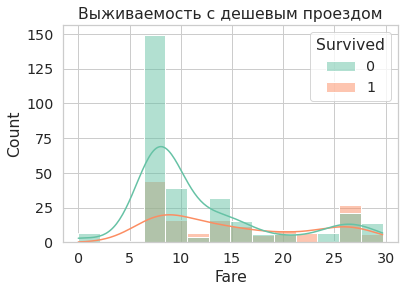

In [7]:
people_poor = people.loc[people['Fare'] < 30]
people_rich = people.loc[people['Fare'].between(30, 300)]
people_billionaires = people.loc[people['Fare'] >= 300]
plt.title('Выживаемость с дешевым проездом')
poor = sns.histplot(data=people_poor, x="Fare", hue='Survived', kde=True)

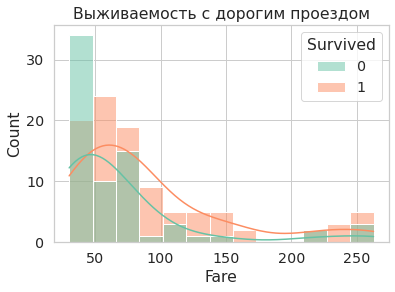

In [8]:
plt.title('Выживаемость с дорогим проездом')
rich = sns.histplot(data=people_rich, x="Fare", hue='Survived', kde=True)

In [9]:
people_billionaires.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,3.0,3.0,3.000000,3.0,3.000000,3.0000
mean,1.0,1.0,35.333333,0.0,0.333333,512.3292
std,0.0,0.0,0.577350,0.0,0.577350,0.0000
min,1.0,1.0,35.000000,0.0,0.000000,512.3292
25%,1.0,1.0,35.000000,0.0,0.000000,512.3292
50%,1.0,1.0,35.000000,0.0,0.000000,512.3292
75%,1.0,1.0,35.500000,0.0,0.500000,512.3292
max,1.0,1.0,36.000000,0.0,1.000000,512.3292


Прослеживается зависимость виживаемости от цены за проезд: с увеличением цены выживает все большая доля пассажиров

Text(0.5, 1.0, 'Влияние пола и класса')

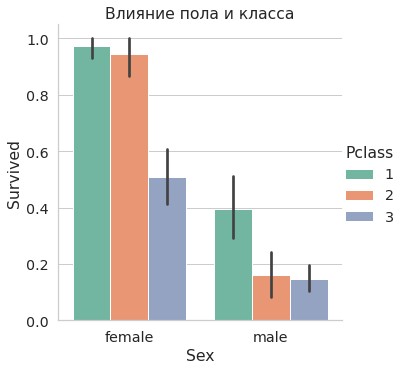

In [10]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=people)
plt.title('Влияние пола и класса')

Чем выше класс, тем больше процент выживаемости, причем женщины выживали чаще, чем мужчины

Text(0.5, 1.0, 'Количество родственников 2 степени')

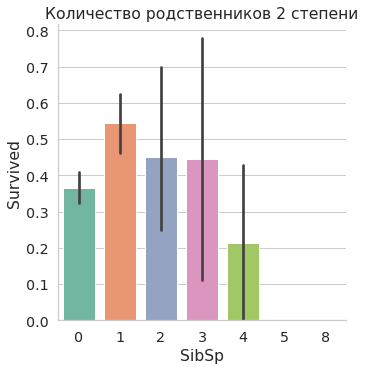

In [11]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=people)
plt.title('Количество родственников 2 степени')

Немного чаще выживале те, у кого на борту был 1 родственник 2 степени родства (брат/сестера/сводный брат/сводная сестера) или супруг

Text(0.5, 1.0, 'Количество родственников 1 степени')

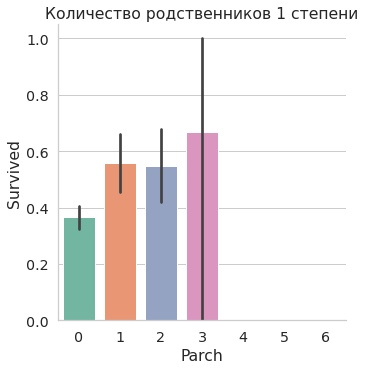

In [12]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=people)
plt.title('Количество родственников 1 степени')

В основном, чем больше у человека на борту было родственников 1 степени родства (родители, дети), тем чаще он выживал

Text(0.5, 1.0, 'Возраст и выживаемость')

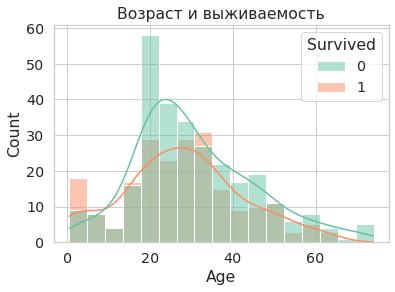

In [13]:
sns.histplot(data=people, x="Age", hue='Survived', kde=True)
plt.title('Возраст и выживаемость')

Только маленьких детей спаслось больше, чем погибло. В остальных случаях погибали чаще, причем больше всего заметна
разница между погибшими и выжившими в возрастной группе от 20 до 30 лет

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

первый вопрос: Пол?
Мужской - погиб<br>Женский - тогда второй вопрос: Pclass == 3? Если да то погибла, если нет то выжила

**Дерево 2:**

Цена за проезд больше 50? Если да то выжил, если нет то погиб

Реализуйте полученные деревья по шаблону

In [14]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    conditions = [predicted['Sex'] == 'female', predicted['Pclass'] != 3]
    values = [True, False]
    predicted['tree1_survived'] = np.select(conditions, values)
    predicted['tree2_survived'] = np.where(predicted['Pclass'] == 3, 0, 1)
    predicted = predicted[['tree1_survived', 'tree2_survived']].copy()
    return predicted

In [15]:
tree = tree(testing_features)
tree

,tree1_survived,tree2_survived
862,1,1
223,0,0
84,1,1
680,1,0
535,1,1
...,...,...
573,1,0
247,1,1
551,0,1
239,0,1


#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Доля предсказаний, не совпавших с реальными данными

Реализуйте данный критерий по шаблону

In [16]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    # Называю колонки одинаково, чтобы потом вычесть 1 таблицу из другой, и, если в колонке "Survived" будет 0,
    # то предсказание совпало с реальностью
    
    predicted.rename(columns={predicted.columns[0]: target.to_frame().columns[0]}, inplace=True)
    result = target.to_frame() - predicted
    count = (result[result.columns[0]] == 0).sum()
    
    return count / (predicted.shape[0])

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [17]:
tree1 = tree[['tree1_survived']].copy()
tree2 = tree[['tree2_survived']].copy()
print('Доля правильных предсказаний в 1 дереве  ', '%.2f'%criteria(testing_target, tree1))
print('Доля правильных предсказаний во 2 дереве ', '%.2f'%criteria(testing_target, tree2))

Доля правильных предсказаний в 1 дереве   0.75
Доля правильных предсказаний во 2 дереве  0.64


#### 5. Выводы

1) Исследование показало, что женщины выживали значительно чаще мужчин, а также женщины из 3 класса выживали сильно реже, чем из 1 и 2. Это видно из диаграммы "Влияние пола и класса" и подкреплено 1-м решающим деревом - предсказание верное в 3/4 случаях<br>
2) Доля выживших растет с увеличением цены за проезд. Это показано на графиках выживаемости и понятно из 2-го решающего дерева<br>
3) Есть связь между выживаемостью и всеми остальными характеристиками пассажиров: <br>немного чаще выживале те, у кого на борту был 1 родственник 2 степени родства и те, у кого было больше родственников 1 степени родства.<br> Во всех возрастных группах, кроме маленьких детей погибло больше половины, наибольшее различие в группе 20 - 30 лет. <br>Это показано на остальных графиках


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

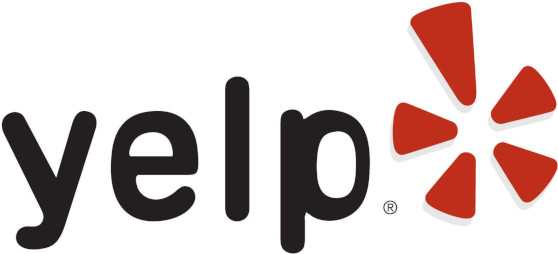

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [18]:
df = pd.read_csv('yelp_business.csv')
df.head(n=5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [19]:
df.groupby(['city'])['name'].count().to_frame().reset_index().sort_values(by='name').tail(n=5)

,city,name
871,Scottsdale,8228
143,Charlotte,8553
983,Toronto,17206
713,Phoenix,17213
424,Las Vegas,26775


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

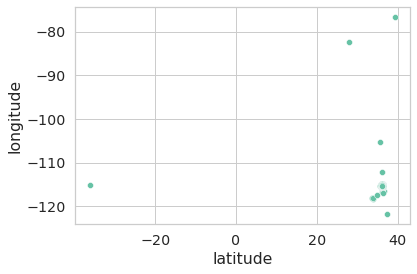

In [20]:
LasVegas = df.loc[df['city'] == 'Las Vegas']
scatter = sns.scatterplot(x='latitude', y='longitude', data=LasVegas)

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

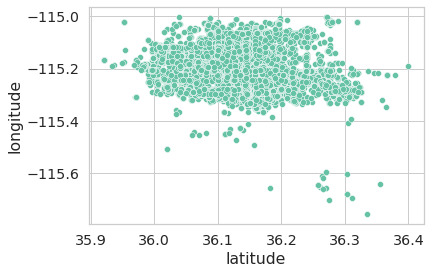

In [21]:
LasVegas = LasVegas.loc[LasVegas['latitude'] < 36.4]
LasVegas = LasVegas.loc[LasVegas['latitude'] > 35.9]
LasVegas = LasVegas.loc[LasVegas['longitude'] < -115.0]
LasVegas = LasVegas.loc[LasVegas['longitude'] > -115.8]
scatter = sns.scatterplot(x='latitude', y='longitude', data=LasVegas)

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [22]:
review = pd.read_csv('yelp_review.csv', index_col=1)
review.head()

,Unnamed: 0,stars
business_id,,
AEx2SYEUJmTxVVB18LlCwA,0,5
VR6GpWIda3SfvPC-lg9H3w,1,5
CKC0-MOWMqoeWf6s-szl8g,2,5
ACFtxLv8pGrrxMm6EgjreA,3,4
s2I_Ni76bjJNK9yG60iD-Q,4,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [23]:
review = review.loc[LasVegas.business_id]
review

,Unnamed: 0,stars
business_id,,
kCoE3jvEtg6UVz5SOD3GVw,456053,4
kCoE3jvEtg6UVz5SOD3GVw,1093900,1
kCoE3jvEtg6UVz5SOD3GVw,2039047,5
kCoE3jvEtg6UVz5SOD3GVw,2979380,5
kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...
9ouC6BpmjFpLfHeQnLQqng,4857506,5
9ouC6BpmjFpLfHeQnLQqng,5256464,5
n9a-3YhibkMDUEgncIivHg,779637,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [24]:
review.pop("Unnamed: 0")

review = review.groupby(['business_id']).aggregate([np.mean, np.size])
review

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[26732 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [25]:
review.columns = ['mean', 'count']
review.head()

,mean,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [26]:
LasVegas = LasVegas.set_index('business_id')
review = review.join(LasVegas, how='left')
review

,mean,count,Unnamed: 0,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
business_id,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,90057,"""Delmonico Steakhouse""",The Strip,"""3355 Las Vegas Blvd S""",Las Vegas,NV,89109,36.123183,-115.169190,1,Cajun/Creole;Steakhouses;Restaurants
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,104765,"""World Food Championships""",The Strip,"""3645 Las Vegas Blvd S""",Las Vegas,NV,89109,36.114277,-115.170975,1,Arts & Entertainment;Festivals
--WsruI0IGEoeRmkErU5Gg,4.928571,14,95522,"""Dial Carpet Cleaning""",Westside,"""3111 S Valley Vw, #H-104""",Las Vegas,NV,89102,36.130899,-115.190785,1,Carpet Cleaning;Local Services
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,508,"""Pinnacle Restoration""",Spring Valley,"""""",Las Vegas,NV,89148,36.061235,-115.289685,1,Drywall Installation & Repair;Handyman;Home Se...
--e8PjCNhEz32pprnPhCwQ,3.473684,19,120281,"""Lucky's Pet Grooming & Boutique""",Downtown,"""1460 E Charleston Blvd""",Las Vegas,NV,89104,36.158851,-115.133272,1,Pets;Pet Groomers;Pet Services;Pet Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,74755,"""Goodtimes Bar & Nightclub""",Southeast,"""1775 E Tropicana Ave""",Las Vegas,NV,89119,36.099328,-115.128494,0,Dance Clubs;Gay Bars;Nightlife;Bars
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,157968,"""Sin City Spray Tans""",Southeast,"""7380 S Eastern Ave, Ste 109C""",Las Vegas,NV,89123,36.055602,-115.118218,0,Spray Tanning;Beauty & Spas;Tanning
zzjqFOujmM9surbMANZ_ag,5.000000,3,72250,"""American Express Open Business Lounge""",Eastside,"""460-798 E Desert Inn Rd""",Las Vegas,NV,89109,36.129838,-115.146037,1,Nightlife;Lounges;Bars


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

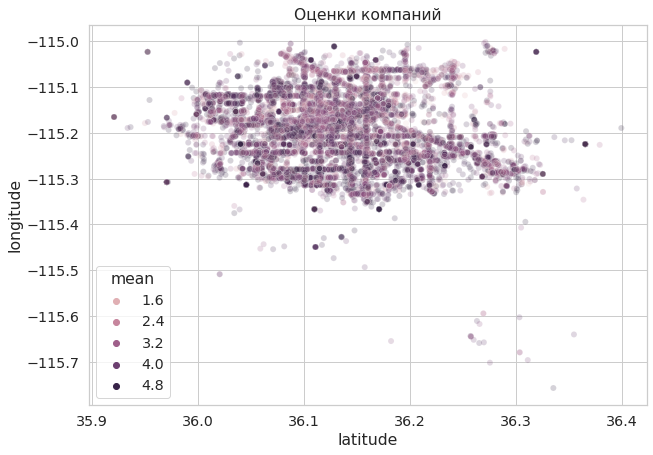

In [27]:
plt.figure(figsize=(10,7))
plt.title("Оценки компаний")
scatter = sns.scatterplot(x='latitude', y='longitude', data=review, hue='mean', alpha=0.2)
without_regions = review.copy()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [28]:
review['longitude'] = np.round(review['longitude']*4, decimals=1)*0.25
review['latitude'] = np.round(review['latitude']*4, decimals=1)*0.25
review.head()

,mean,count,Unnamed: 0,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
business_id,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,90057,"""Delmonico Steakhouse""",The Strip,"""3355 Las Vegas Blvd S""",Las Vegas,NV,89109,36.125,-115.175,1,Cajun/Creole;Steakhouses;Restaurants
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,104765,"""World Food Championships""",The Strip,"""3645 Las Vegas Blvd S""",Las Vegas,NV,89109,36.125,-115.175,1,Arts & Entertainment;Festivals
--WsruI0IGEoeRmkErU5Gg,4.928571,14,95522,"""Dial Carpet Cleaning""",Westside,"""3111 S Valley Vw, #H-104""",Las Vegas,NV,89102,36.125,-115.200,1,Carpet Cleaning;Local Services
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,508,"""Pinnacle Restoration""",Spring Valley,"""""",Las Vegas,NV,89148,36.050,-115.300,1,Drywall Installation & Repair;Handyman;Home Se...
--e8PjCNhEz32pprnPhCwQ,3.473684,19,120281,"""Lucky's Pet Grooming & Boutique""",Downtown,"""1460 E Charleston Blvd""",Las Vegas,NV,89104,36.150,-115.125,1,Pets;Pet Groomers;Pet Services;Pet Stores


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

<AxesSubplot:title={'center':'Оценки по районам'}, xlabel='longitude', ylabel='latitude'>

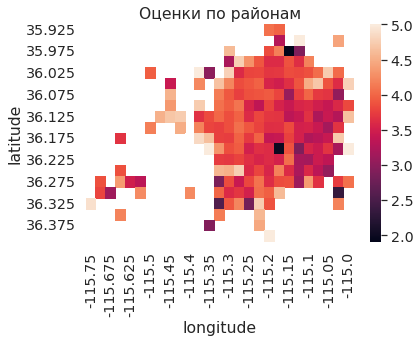

In [29]:

marks = pd.pivot_table(review, index="latitude", columns="longitude", values="mean")
plt.title("Оценки по районам")
sns.heatmap(marks)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Если есть район, где мало компаний, и при этом у них средний рейтинг сильно отличается от большинства других районов, где много компаний, то у районов где много компаний будут очень похожие цвета и из heatmap не будет понятно как отличаются оценки в районах где много компаний, а это главное, что хочется увидеть в heatmap

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

<AxesSubplot:title={'center':'Оценки по районам'}, xlabel='longitude', ylabel='latitude'>

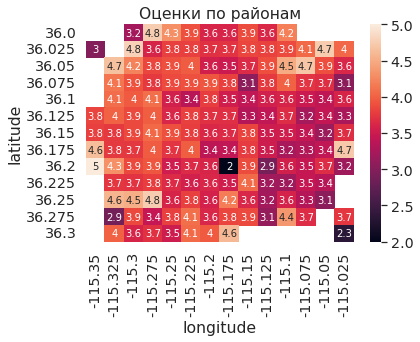

In [30]:
df1 = review.groupby(['latitude', 'longitude']).size().to_frame()
df1.columns = ['count']
df2 = df1.loc[df1['count'] >= 30]
df2 = df2.reset_index()
final = review[review["latitude"].isin(df2.latitude) & review["longitude"].isin(df2.longitude)]
marks = pd.pivot_table(final, index="latitude", columns="longitude", values="mean")
plt.title("Оценки по районам")
sns.heatmap(marks, annot=True)


Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** На карте видны скопления районов с примерно одинаковыми по оценкам компаниями. Например на северо-западе находятся компании с хорошими оценками, на севере и западе тоже неплохие, а на юго-востоке не очень. Есть районы с сильно отличающимися оценками от соседних районов, но таких немного.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

<AxesSubplot:title={'center':'Оценки ресторанов по районам'}, xlabel='longitude', ylabel='latitude'>

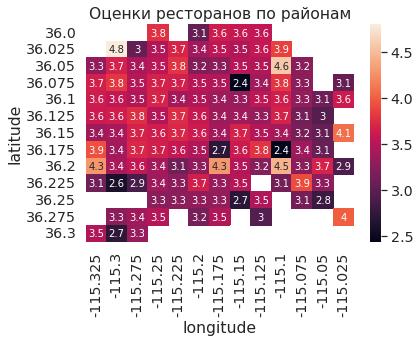

In [31]:
review_rest = review[review['categories'].str.contains('restaurant|Restaurant')]
review_rest = review_rest.loc[review_rest['count'] >= 5]
df1 = review_rest.groupby(['latitude', 'longitude']).size().to_frame()
df1.columns = ['count']
df2 = df1.loc[df1['count'] >= 10]
df2 = df2.reset_index()
final = review_rest[review_rest["latitude"].isin(df2.latitude) & review_rest["longitude"].isin(df2.longitude)]
marks = pd.pivot_table(final, index="latitude", columns="longitude", values="mean")
plt.title("Оценки ресторанов по районам")
sns.heatmap(marks, annot=True)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** если отзывов мало, то исследовать оценку какой-то маленькой группы людей нет смысла, потому что она может не совпадать с мнением большинства. Если не будет ограничения снизу на количество ресторанов в районе, могут появиться выбросы (районы где оценка сильно отличается от остальных) из-за чего оттенки на диаграмме станут более похожими и карта будет не такая наглядная. А если вдруг в районе мало ресторанов то средняя оценка по району сильнее зависит от ресторанов, которые сами пишут себе хорошие отзывы и район получит неоправданно высокую среднюю оценку

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [32]:
without_regions = without_regions[without_regions['categories'].str.contains('restaurant|Restaurant')]
final = without_regions.loc[without_regions['count'] >= 50]
final_new = final.reset_index()
final_new = final_new[['name', 'mean', 'count', 'latitude', 'longitude', 'categories']].copy()
final_new = final_new.sort_values(by=['mean'], ascending=False)
top10 = final_new.head(n=10)
top10

,name,mean,count,latitude,longitude,categories
2100,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
769,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
2474,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
2178,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
908,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
2175,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
430,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
2216,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
2055,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...
119,"""Smooth Eats""",4.807018,57,36.167894,-115.140238,Juice Bars & Smoothies;Restaurants;Sandwiches;...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

<AxesSubplot:title={'center':'хорошие рестораны'}, xlabel='latitude', ylabel='longitude'>

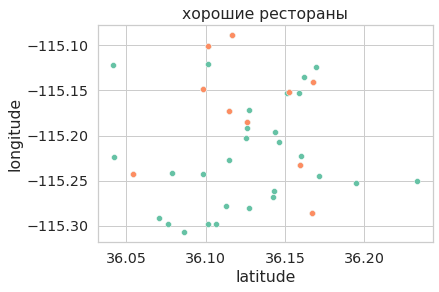

In [33]:
final_last = final_new.loc[final_new['mean'] >= 4.7]
#marks = pd.pivot_table(final_last, index="latitude", columns="longitude", values="mean")
plt.title("хорошие рестораны")
sns.scatterplot(x='latitude', y='longitude', data=final_last)
sns.scatterplot(x='latitude', y='longitude', data=top10)


Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Про Василия:** Василий молодец, доверяет проверенному. Но возможно ему стоило смотреть не на 10 лучших ресторанов, а на рестораны с оценкой не менее 4.7, потому что, так на карте появляются рестораны, которые находятся рядом, и если Василию вдруг где-то не понравится, ему не надо будет далеко идти до другого ресторана :)

**Вывод:** Лас-Вегас делится на районы, в каких-то районах много комапаний, в каких-то нет. Средние оценки и их количество тоже различается в разных районах. Если откинуть компании, у которых мало отзывов, то видно, что на юго-востоке города сосредоточено большинство компаний с низким рейтингом. Если рассмотреть отдельно рестораны, прослеживается, что на северо-западе оценки у ресторанов выше всего. Однако, если посмотреть на рестораны с оценкой выше 4.7, такой закономерности уже не видно


---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

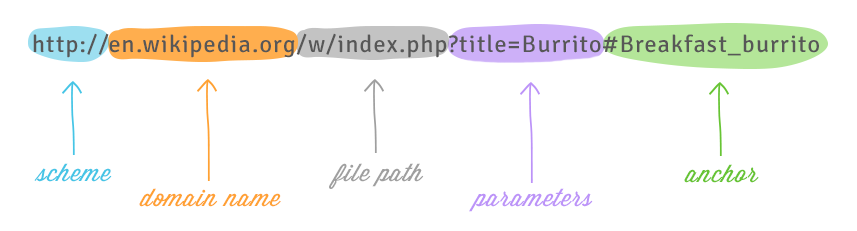

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму для времени скачивания страницы.

In [ ]:
...

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

In [ ]:
...

**Выводы:** <...>